In [22]:
# Mapas de Climate Action Tracker, evaluación de NDCs

import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors

import geopandas as gpd

import plotly.express as px
from PIL import Image

In [23]:
# Datos

# Carpetas
path_r = "../share/Indexes/"
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
path_v = "../data/variables.csv"
map_d = "../../Bases_de_datos/Mapas/"
data_d = "../results/"
wb_path = "../../Bases_de_datos/World_Bank_CCKP/"

# Mapas
map_f = "Natural_Earth/ne_50m_admin_0_countries_mod"

# Códigos nacionales y subnacionales
ix  = "ISO_A3"

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Nombres de índices
index_n = [
    "Climate change risk index",
    "Climate change exposure index",
    "Social vulnerability index, physical climate impacts",
    "Sea level rise exposure index",
    "Drought exposure index",
    "Extreme heat exposure index",
    "Extreme rainfall exposure index",
    "Hurricane exposure index",
    "Life expectancy at birth index", "log GNI per capita, PPP index",
    "Gender Development index index", "% rural population index",
    "% population below 15 or above 65 years old index" ]
climate = index_n[1:2] + index_n[3:8]
social = index_n[2:3] + index_n[8:13]

# Catálogo de datos
df_catalog = pd.read_csv(path_catalog)

# Índices climáticos y socioeconómicos
df_c = pd.read_csv(path_r + "climate_index.csv", index_col = ix)
df_s = pd.read_csv(path_r + "Physical_vulnerability_index.csv", index_col = ix)
df_r = pd.read_csv(path_r + "climate_risk_index.csv", index_col = ix)

# Variables utilizadas para el índicador de resiliencia
df_v = pd.read_csv(path_v)

# Mapas
gdf_2 = gpd.read_file( map_d + map_f ).rename(
    columns = {"GU_A3": ix} ).set_index( ix )

# Cargamos datos
id = "CAT_Assessment"
df_cat = pd.read_csv( "../../"
    + df_catalog.loc[df_catalog["ID"]==id, "Path"].iloc[0]
    + df_catalog.loc[df_catalog["ID"]==id, "Filename" ].iloc[0],
    index_col = "alpha-3" )
df_cat["alpha-2"] = df_iso["alpha-2"]
df_cat.loc["-99", "alpha-2"] = "EU"
df_cat.head()

,Country,Overall rating,Policies and action,Domestic or supported target,Fair share target,Climate finance,Net zero target,Update date,% of global emissions (Worldometer),alpha-2
alpha-3,,,,,,,,,,
ARG,Argentina,Critically insufficient,Highly insufficient,Highly insufficient,Critically insufficient,Not assessed,Poor,oct-23,0.48%,AR
AUS,Australia,Insufficient,Insufficient,Almost Sufficient,Insufficient,Critically insufficient,Poor,Dec 2023,1.02%,AU
BTN,Bhutan,Almost Sufficient,1.5°C compatible,1.5°C global least cost,Almost Sufficient,Not applicable,Information incomplete,jul-23,0.00%,BT
BRA,Brazil,Insufficient,Insufficient,Almost Sufficient,Almost Sufficient,Not applicable,Poor,Aug 2024,1.21%,BR
CAN,Canada,Highly insufficient,Highly insufficient,Almost Sufficient,Insufficient,Highly insufficient,Average,Dec 2022,1.51%,CA


KeyError: "None of [Index(['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'SWE', 'FIN',\n       'FRA', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD',\n       'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'],\n      dtype='object', name='ISO_A3')] are in the [index]"

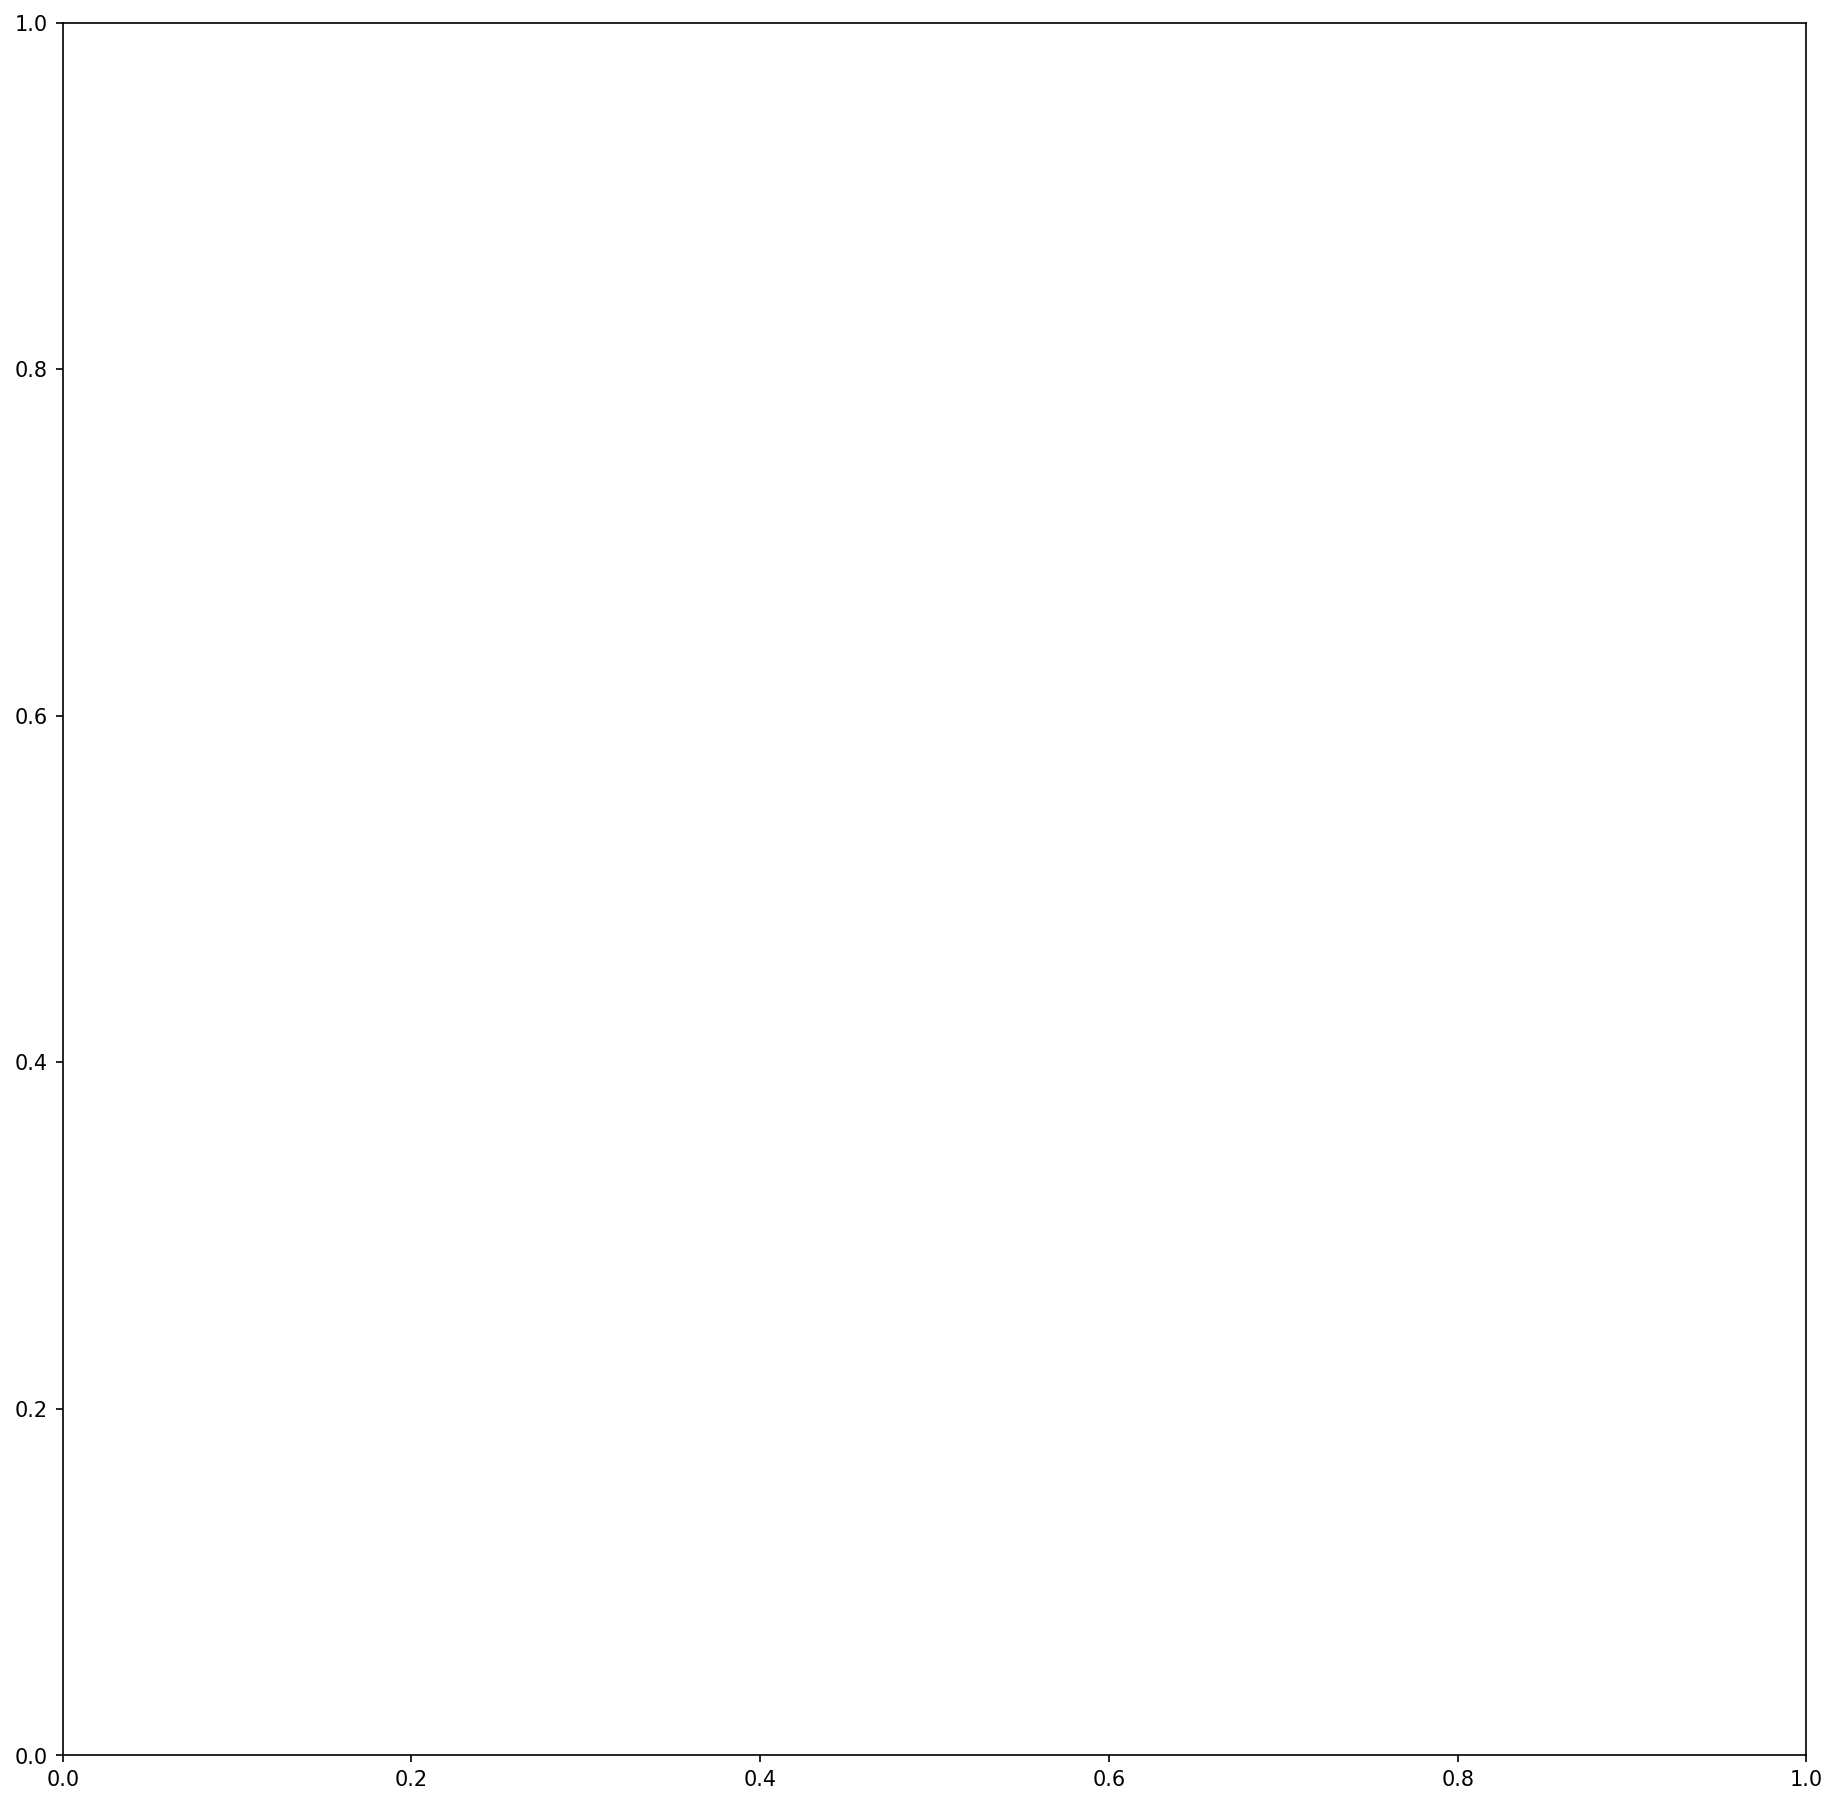

In [24]:
# Gráfica de Climate Action Tracker Net Zero Rating

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(15, 15)
fig.set_dpi(150) 


# Cambiamos los nombres para que estén ordenados alfabéticamente.
gdf_2["Net Zero Rating"] = df_cat["Net zero target"]
gdf_2.loc[["AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "SWE",
    "FIN", "FRA", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT",
    "NLD", "POL", "PRT", "ROU", "SVK", "SVN", "ESP"],
    "Net Zero Rating"] = "Acceptable"
gdf_2["Net Zero Rating"] = gdf_2["Net Zero Rating"].fillna( "No target"
    ).replace( { "Information incomplete": "Target information incomplete",
    "Acceptable": "Rating: Acceptable", "Average": "Rating: Average",
    "Poor": "Rating: Poor" } )

# Establecemos los colores 
color_dict = {
    "No Target": "lightgrey", "Rating: Acceptable": "#66a652",
    "Rating: Average": "#f5e363", "Rating: Poor": "#ef6948", 
    "Target information incomplete": "#646d72",
    }

# Graficamos Net Zero Rating
gdf_2.plot( ax = ax, column = gdf_2["Net Zero Rating"],
    cmap = colors.ListedColormap(list(color_dict.values())),
    edgecolor = "black", linewidth = 0.5, legend = True,
    legend_kwds = {"title": "Net Zero Rating", "loc": "lower left"} ) 

# Ajustes de visualización
#ax.axis('off')
ax.margins(0)
ax.tick_params( left = False, labelleft = False,
    bottom = False, labelbottom = False )
ax.set_facecolor("lightblue")
ax.set_ylim(-90, 90)

plt.show()

KeyError: "None of [Index(['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'SWE', 'FIN',\n       'FRA', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD',\n       'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'],\n      dtype='object', name='ISO_A3')] are in the [index]"

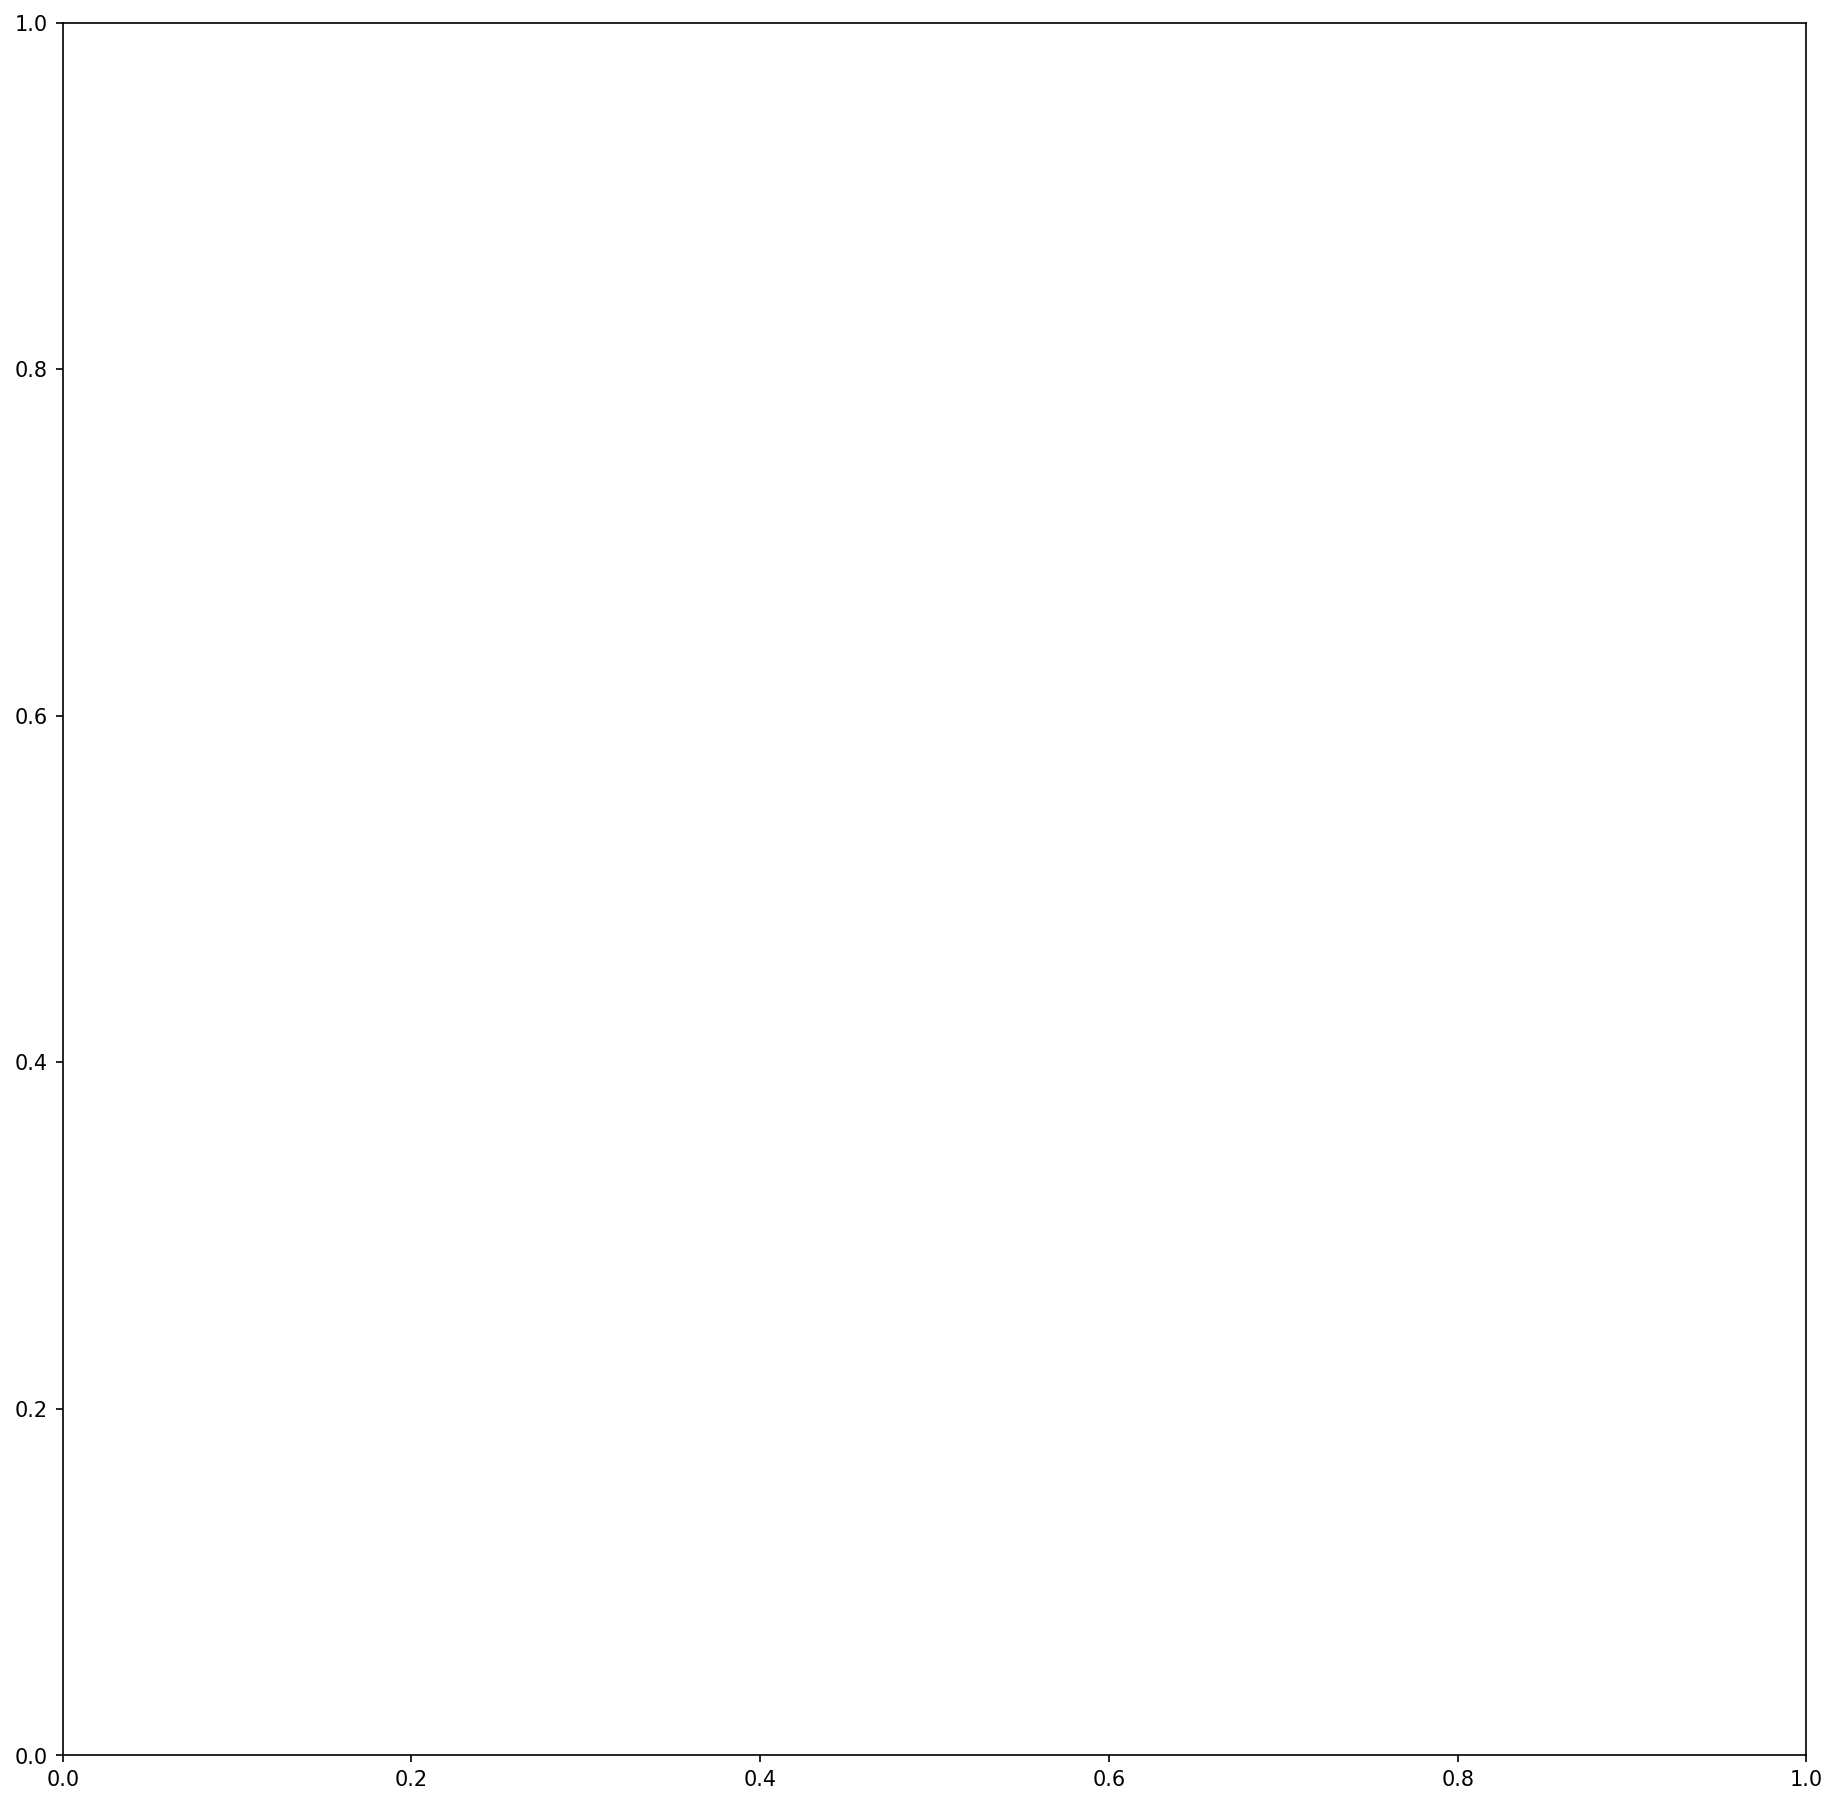

In [25]:
# Gráfica de Climate Action Tracker Net Zero Rating

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(15, 15)
fig.set_dpi(150) 

gdf_2["NDC Assessment"] = df_cat["Policies and action"]
gdf_2.loc[["AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "SWE",
    "FIN", "FRA", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT",
    "NLD", "POL", "PRT", "ROU", "SVK", "SVN", "ESP"],
    "Net Zero Rating"] = "Insufficient"

# Cambiamos los nombres para que estén ordenados alfabéticamente.
gdf_2["NDC Assessment"] = gdf_2["NDC Assessment"].fillna(
    "Policies and Actions not Assessed" ).replace( {
    "Almost Sufficient": "Policies and Actions almost sufficient",
    "1.5°C compatible": "Policies and Actions compatible with 1.5°C",
} )

# Establecemos los colores 
color_dict = {
    "Critically insufficient": "#646d72", "Highly insufficient": "#ef6948",
    "Insufficient": "#f2ad48",
    "Policies and Actions almost sufficient": "#f5e363",
    "Paris Agreement compatible with 1.5°C": "#66a652",
    "Not Assessed": "lightgray"
    }

# Graficamos Net Zero Rating
gdf_2.plot( ax = ax, column = gdf_2["NDC Assessment"],
    cmap = colors.ListedColormap(list(color_dict.values())),
    edgecolor = "black", linewidth = 0.5, legend = True,
    legend_kwds = {"title": "NDC Assessment", "loc": "lower right", "ncol": 2} ) 

# Ajustes de visualización
#ax.axis('off')
ax.margins(0)
ax.tick_params( left = False, labelleft = False,
    bottom = False, labelbottom = False )
ax.set_facecolor("lightblue")
ax.set_ylim(-90, 90)

plt.show()

In [ ]:
df_cat["Net zero target"].unique()

array(['Poor', 'Information incomplete', 'Average', 'Acceptable',
       'No target'], dtype=object)

In [27]:
ndc_n = ["Critically insufficient", "Highly insufficient",
    "Insufficient", "Almost Sufficient", "1.5°C compatible"]
def cat_ndc(x):
    if   x == ndc_n[0]: y = 0
    elif x == ndc_n[1]: y = 1
    elif x == ndc_n[2]: y = 2
    elif x == ndc_n[3]: y = 3
    elif x == ndc_n[4]: y = 4
    return y

net_n = ["Information incomplete", "Poor", "Average", "Acceptable"]
def cat_net(x):
    if   x == net_n[0]: y = 0
    elif x == net_n[1]: y = 1
    elif x == net_n[2]: y = 2
    elif x == net_n[3]: y = 3
    else: y = np.nan
    return y

df_cat["Policies and action_N"] = df_cat["Policies and action"].apply(cat_ndc)
df_cat["Net zero target_N"] = df_cat["Net zero target"].apply(cat_net)
df_cat[index_n[1]] = df_c[index_n[1]]
df_cat[index_n[2]] = df_s[index_n[2]]

df_cat.loc["-99", index_n[1]] = df_c.loc[
    df_iso[ df_iso["EU27"] ].drop("DEU").index, index_n[1] ].mean()
df_cat.loc["-99", index_n[2]] = df_s.loc[
    df_iso[ df_iso["EU27"] ].drop("DEU").index, index_n[2] ].mean()

In [36]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Policies and action_N"
i = 1
df_plot = df_cat[(df_cat[vn].notnull())]

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn,
    hover_name = "Country", labels = { vn: "" } )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Agregamos la bandera de cada país
for j, row in df_plot.iterrows():
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )

# Ajustes de visualización
fig.update_layout(  title = "NDC Assessment", height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf",  margin = dict( l = 20, r = 20, t = 50, b = 20),
    xaxis_range=[1,10.2], yaxis_range=[-0.25,4.25],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 5),
    ticktext = ndc_n ) )

fig.show()

In [43]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Policies and action_N"
i = 2
df_plot = df_cat[(df_cat[vn].notnull())]

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn,
    hover_name = "Country", labels = { vn: "" } )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Agregamos la bandera de cada país
for j, row in df_plot.iterrows():
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )

# Ajustes de visualización
fig.update_layout(  title = "NDC Assessment", height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf",  margin = dict( l = 20, r = 20, t = 50, b = 20),
    xaxis_range=[0.75,9], yaxis_range=[-0.25,4.25],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 5),
    ticktext = ndc_n ) )

fig.show()

In [38]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Net zero target_N"
i = 1
df_plot = df_cat[(df_cat[vn].notnull())]

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn,
    hover_name = "Country", labels = { vn: "" } )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Agregamos la bandera de cada país
for j, row in df_plot.iterrows():
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )

# Ajustes de visualización
fig.update_layout( title = "Net Zero Rating", height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf", margin = dict( l = 20, r = 20, t = 50, b = 20),
    xaxis_range = [1,10.25], yaxis_range = [-0.25,3.25],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 4),
    ticktext = net_n ) )

fig.show()

In [42]:
# Graficamos los indicadores para los países con objetivo Net Zero
vn = "Net zero target_N"
i = 2
df_plot = df_cat[(df_cat[vn].notnull())]

# Graficamos las coordenadas de los países y el Net Zero Rating
fig = px.scatter( df_plot, x = index_n[i], y = vn,
    hover_name = "Country", labels = { vn: "" } )
# Hacemos que el scatter sea invisible
fig.update_traces( marker_color = "rgba(0,0,0,0)" )

# Agregamos la bandera de cada país
for j, row in df_plot.iterrows():
    fig.add_layout_image( { "source":
        Image.open(f"../../Bases_de_datos/Flags/{row["alpha-2"]}.png"),
        "xref": "x", "yref": "y", "xanchor": "center", "yanchor": "middle",
        "x": row[index_n[i]], "y": row[vn], "sizex": 0.4, "sizey": 0.4,
        "sizing": "contain", "opacity": 0.8, "layer": "above" } )

# Ajustes de visualización
fig.update_layout( title = "Net Zero Rating", height = 400, width = 1000,
    plot_bgcolor = "#dfdfdf", margin = dict( l = 20, r = 20, t = 50, b = 20),
    xaxis_range = [0.75,9], yaxis_range = [-0.25,3.25],
    yaxis = dict( tickmode = "array", tickvals = np.arange(0, 4),
    ticktext = net_n ) )

fig.show()